In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

# Coordenadas homogéneas

Un sistema de **coordenadas homogéneas** se utiliza como base para la *geometría proyectiva*, la cual estudia las transformaciones que deben realizarse para proyectar la imagen de un objeto, ubicado en el espacio tridimensional, a un plano arbitrario [por ejemplo cuando capturas una fotografía]. Estas transformaciones son muy importantes en el área de **gráficas por computadora**. 

Dadas las coordenadas cartesianas de un punto, $p=(x,\;y)$, las coordenadas homogéneas, $p_h$ se obtienen agregando una nueva componente con el número uno:

$$p_h = (x,\;y,\;1)$$

Por ejemplo, si $p=(5,\;-3)$, $p_h=(5,\;-3,\;1)$

La transformación inversa, la que permite transformar de coordenadas homogéneas a cartesianas, se realiza dividiendo cada componente del vector por el valor de la tercera. Por ejemplo, el punto con coordenadas homogéneas $p_h = (2,\;-5,\;3)$ se transforma al punto con coordenadas cartesianas $p=(\frac{2}{3}, -\frac{5}{3})$ 




# Homografía


* Una homografía es una transformación lineal que mapea puntos de un plano con otros puntos del mismo plano. La homografía está definida por una matriz cuadrada, $H$, de orden tres.  
* Si $p=(x,y)$, son las coordenadas cartesianas de un punto, y $p_h=(x,y,1)$ las coordenadas homogéneas correspondientes, se determinan con el producto: 

$$Hp_h = p'$$


**Ejemplo**

Si $H = \begin{bmatrix} 1.1 & 0.2 & 0 \\ -0.1 & 0.98 & 0 \\ 0 & 0.02 & 1 \end{bmatrix}$ ¿cuáles son las coordenadas del punto $p=(2,-3)$ una vez transformado?



In [2]:
H = np.array([[1.1, 0.2, 0], [-0.1, 0.98, 0], [0, 0.02, 1]])
x = np.array([2,-3,1])
xn = np.dot(H,x)

In [3]:
xn

array([ 1.6 , -3.14,  0.94])

In [4]:
xt = xn/xn[-1]
print xt[:2]
print xt

[ 1.70212766 -3.34042553]
[ 1.70212766 -3.34042553  1.        ]


## Ejemplo 

Generamos y transformamos una nube de puntos

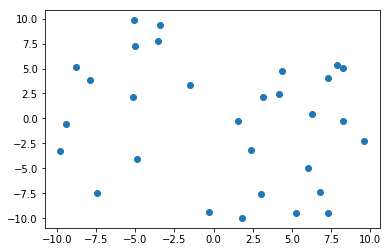

In [5]:
# Nube de puntos
p = 10*(2*np.random.rand(30,2)-1)
plt.scatter(p[:,0],p[:,1])
plt.show()

Agregamos una columna con unos

In [6]:
p_df = pd.DataFrame({'x':p[:,0], 'y':p[:,1], 'h':np.ones(30)}, columns=['x', 'y', 'h'])
p_df

,x,y,h
0,5.284423,-9.474544,1.0
1,-0.284535,-9.409034,1.0
2,8.261397,5.068860,1.0
3,4.363803,4.772216,1.0
4,-7.877602,3.846003,1.0
5,-7.476413,-7.438898,1.0
6,9.609185,-2.292082,1.0
7,6.772621,-7.387859,1.0
8,-5.108736,9.823494,1.0
9,-4.884166,-4.108207,1.0


Transformamos los puntos aplicando la homografía

In [7]:
#Aplicamos la transformación geométrica
#m = pd.DataFrame.as_matrix(p_df)
m = p_df.values
pt = np.dot(H,np.transpose(m))
pt = np.transpose(pt)
print np.dot(H,np.transpose(m))
#pt

[[  3.91795641  -2.19479491  10.1013088    5.75462621  -7.89616134
   -9.71183451  10.11168677   5.97231104  -3.65491104  -6.19422426
   -2.32866439   5.61923581  -1.91267958   3.86885865   1.80587528
    0.03135309   5.07499417  -8.60991051  -4.05122819  -1.01641596
    9.03648432   9.72287182   6.14531876   1.66861548 -11.4380364
    7.00557293 -10.44366839   1.97339516  -5.2045959    8.84876064]
 [ -9.813495    -9.19239994   4.14134288   4.24039152   4.556843
   -6.54247915  -3.20715923  -7.91736418  10.1378982   -3.53762637
    7.94912814  -5.50590229   9.55575043   1.79803252  -7.70701878
   -9.94093354   1.98131307   5.93415048   7.58568547   3.43448979
   -1.09152532   4.41024575 -10.05745836  -0.45008302  -2.21252527
   -0.19529123   0.40896719  -3.31842433   2.63200423   3.21465195]
 [  0.81050913   0.81181932   1.1013772    1.09544432   1.07692006
    0.85122203   0.95415835   0.85224281   1.19646989   0.91783586
    1.1550305    0.89991678   1.18797919   1.04307325   0.84886

In [8]:
pt_n = [np.divide(pt[:,0],pt[:,2]),np.divide(pt[:,1],pt[:,2])]
pt_n = pd.DataFrame({'x': pt_n[0], 'y': pt_n[1]}, columns = ['x', 'y'])
pt_n

,x,y
0,4.833945,-12.107816
1,-2.703551,-11.323209
2,9.171525,3.760149
3,5.253235,3.870933
4,-7.332170,4.231366
5,-11.409285,-7.685984
6,10.597493,-3.361244
7,7.007758,-9.290033
8,-3.054746,8.473175
9,-6.748728,-3.854313


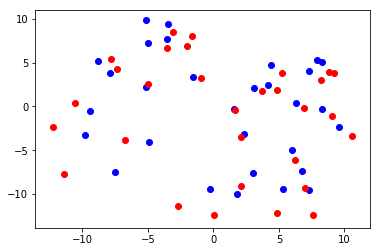

In [9]:
plt.scatter(p[:,0],p[:,1],c='b')
plt.scatter(pt_n['x'], pt_n['y'],c='r')
plt.show()

# Algunos casos especiales

## Traslación

Obtenemos una traslación si la matriz de homografía tiene la siguiente estructura:

$$H = \begin{bmatrix} 1 & 0 & t_1 \\ 0 & 1 & t_2 \\ 0 & 0 & 1 \end{bmatrix}$$

siendo $t = (t_1,t_2)$ el vector de traslación.

Por ejemplo, en la siguiente celda aplicamos una traslación a una nube de puntos arbitraria.

/home/jj/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


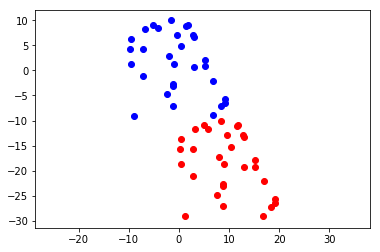

In [10]:
t = [10,-20]
H = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])

#nube de puntos
n = 30
p = 10*(2*np.random.rand(n,2)-1)
o = np.ones((n,1))

#coordenadas homogéneas
ph = np.hstack((p,o))

#aplica la homografía
pht = np.dot(H,np.transpose(ph))
pht = np.transpose(pht)
pt = pht[:,:2]

plt.scatter(p[:,0],p[:,1],c='b') #puntos originales
plt.scatter(pt[:,0],pt[:,1],c='r') #puntos transformados
plt.axes().set_aspect('equal', 'datalim')
plt.show()

## Rotación

Para realizar una rotación, por un ángulo $\theta$, la matriz de homografía debe tener la siguiente estructura:

$$H = \begin{bmatrix} \cos{\theta} & -\sin{\theta} & 0 \\ \sin{\theta} & \cos{\theta} & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

Observa el proceso en la siguiente celda

0.785398163397


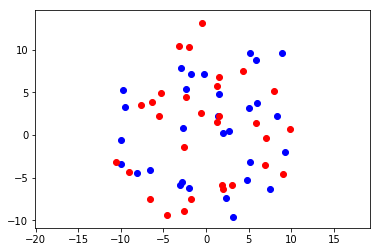

In [11]:
theta_grads = 45
theta_rads = theta_grads*np.pi/180.0
print theta_rads
H = np.array([[np.cos(theta_rads), -np.sin(theta_rads), 0], [np.sin(theta_rads), np.cos(theta_rads), 0], [0, 0, 1]])

#nube de puntos
n = 30
p = 10*(2*np.random.rand(n,2)-1)
o = np.ones((n,1))

#coordenadas homogéneas
ph = np.hstack((p,o))

#aplica la homografía
pht = np.dot(H,np.transpose(ph))
pht = np.transpose(pht)
pt = pht[:,:2]

plt.scatter(p[:,0],p[:,1],c='b') #puntos originales
plt.scatter(pt[:,0],pt[:,1],c='r') #puntos transformados
plt.axes().set_aspect('equal', 'datalim')
plt.show()

## Escalamiento

Para escalar una nube de puntos, la matriz de homografía es:

$$H = \begin{bmatrix} s & 0 & 0 \\ 0 & s & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

siendo $s$ el factor de escala

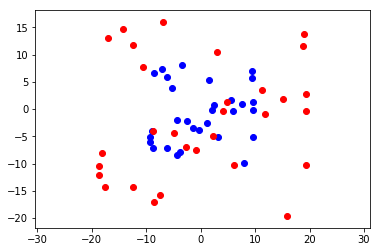

In [12]:
s = 2
H = np.array([[s, 0, 0], [0, s, 0], [0, 0, 1]])

#nube de puntos
n = 30
p = 10*(2*np.random.rand(n,2)-1)
o = np.ones((n,1))

#coordenadas homogéneas
ph = np.hstack((p,o))

#aplica la homografía
pht = np.dot(H,np.transpose(ph))
pht = np.transpose(pht)
pt = pht[:,:2]

plt.scatter(p[:,0],p[:,1],c='b') #puntos originales
plt.scatter(pt[:,0],pt[:,1],c='r') #puntos transformados
plt.axes().set_aspect('equal', 'datalim')
plt.show()

# Recuperación de la homografía

Considera que tienes dos conjuntos de puntos. Uno de ellos es el resultado de haber aplicado una transformación lineal al otro **pero la matriz de homografía es desconocida**. ¿Cómo podemos recuperarla?

Supongamos que guardamos las coordenadas homogéneas de los puntos del primer conjunto en una matriz $P$:

$$P = 
    \begin{bmatrix} 
        x_1 & y_1 & 1 \\
        x_2 & y_2 & 1 \\
        x_3 & y_3 & 1 \\
        \vdots & \vdots & \vdots \\
        x_n & y_n & 1 \\
    \end{bmatrix}$$
    
Mientras que la matriz que guarda las coordenadas del segundo conjunto de puntos es:


$$ Q = 
    \begin{bmatrix} 
        x'_1 & y'_1 & 1 \\
        x'_2 & y'_2 & 1 \\
        x'_3 & y'_3 & 1 \\
        \vdots & \vdots & \vdots \\
        x'_n & y'_n & 1 \\
    \end{bmatrix}
$$

Observa que, por simplicidad, suponemos que la transformación es afín. 

Supongamos que la matriz de homografía, desconocida, es:

$$
    H = 
    \begin{bmatrix} 
        a_{11} & a_{12} & a_{13}\\
        a_{21} & a_{22} & a_{23}\\
        0 & 0 & 1\\
    \end{bmatrix}
$$

Los valores de la matriz de homografía deben resolver los siguientes sistemas de ecuaciones:

\begin{align}
    x'_1 &= a_{11}x_1+a_{12}y_1+a_{13}\\
    x'_2 &= a_{11}x_2+a_{12}y_2+a_{13}\\
    \vdots &= \vdots \\
    x'_n &= a_{11}x_n+a_{12}y_n+a_{13}\\
\end{align}

y para la ordenada:

\begin{align}
    y'_1 &= a_{21}x_1+a_{22}y_1+a_{23}\\
    y'_2 &= a_{21}x_2+a_{22}y_2+a_{23}\\
    \vdots &= \vdots \\
    y'_n &= a_{21}x_n+a_{22}y_n+a_{23}\\
\end{align}

Observa que, en general, estos sistemas tienen más ecuaciones que incógnitas [suponemos que $n>6$].

Los sistemas también pueden expresarse de forma matricial como:

\begin{align}
    \mathbf{X}' &= P\mathbf{a_1}
                 &\\     
    \mathbf{Y}' &= P\mathbf{a_2}
\end{align}

Siendo $\mathbf{X}'$ la primera columna de la matrix $Q$, $\mathbf{Y}'$ la segunda, $\mathbf{a_1} = \begin{bmatrix} 
                        a_{11} \\ 
                        a_{12} \\ 
                        a_{13} \\        
                    \end{bmatrix}$ y $\mathbf{a_2} = \begin{bmatrix} 
                        a_{21} \\ 
                        a_{22} \\ 
                        a_{23} \\        
                    \end{bmatrix}$ 



## Mínimos cuadrados

En la discusión que sigue nos limitaremos a describir la solución del sistema de ecuaciones 

\begin{align}
    \mathbf{X}' &= P\mathbf{a_1} 
\end{align}

ya que los resultados que obtengamos pueden adaptarse para resolver el otro sistema.

En la práctica, dado que las coordenadas de los puntos se miden con cierto grado de incertidumbre, debemos renunciar a cumplir de forma exacta la igualdad y conformarnos con cumplirla de forma aproximada. Para este fin podemos definir los siguientes errores:

\begin{align}
    e_1 &= x'_1-(a_{11}x_1+a_{12}y_1+a_{13})\\
    e_2 &= x'_2-(a_{11}x_2+a_{12}y_1+a_{13})\\
    \vdots &= \vdots\\
    e_n &= x'_n-(a_{11}x_n+a_{12}y_n+a_{13})\\
\end{align}

Que matricialmente se escribe como: 

$$
\mathbf{e} = \mathbf{X'}-P\mathbf{a_1}
$$

Observa que buscamos la tripleta de valores que minimice la mayor cantidad de errores.
                    
Debemos considerar que, para una tripleta dada, los errores peuden ser positivos en algunas ocasiones y negativos en otras. Si los sumáramos para realizar una estimación global de la calidad de la tripleta para resolver el problema, los errores positivos pueden cancelar a los negativos y dar una idea equivocada. Es adecuado entonces elevar los errores al cuadrado para hacerlos todos positivos. 

Basados en lo anterior, buscamos la tripleta de valores, $\begin{bmatrix} 
                        a_{11} \\ 
                        a_{12} \\ 
                        a_{13} \\        
                    \end{bmatrix}$ que minimice la siguiente suma:
                    
   \begin{align}
       E(a_{11}, a_{12}, a_{13}) &= \sum_{i=1}^{n}e_i^{2}\\
                                 &= \sum_{i=1}^{n}[x'_i-(a_{11}x_1+a_{12}y_1+a_{13})]^{2}\\ 
   \end{align}
   
El problema que acabamos de plantear se conoce con el nombre de **mínimos cuadrados**.

De forma matricial, podemos reescribirlo como:

\begin{align}
    E(a_{11}, a_{12}, a_{13}) &= \mathbf{e}^{T}\mathbf{e}\\
    E(a_{11}, a_{12}, a_{13}) &= \left(\mathbf{X'}-P\mathbf{a_1}\right)^{T}\left(\mathbf{X'}-P\mathbf{a_1}\right)\\
\end{align}

Puede demostrarse, usando cálculo diferencial, que la tripleta que resuelve el problema de mínimos cuadrados es la siguiente:

$$\mathbf{a_1} = (P^{T}P)^{-1}P^{T}X'$$

# <font color="red">Práctica</font>

En la siguiente celda, se genera un conjunto de puntos que después se transforma geométricamente a partir de una homografía conocida. El objetivo de la práctica es que recuperes los parámetros de la homografía utilizando mínimos cuadrados. Puedes utilizar la librería de $\texttt{numpy}$ para resolver las operaciones matriciales.

1. Elige tres parejas de puntos correspondientes, plantea dos sistemas de ecuaciones [cada uno de tres por tres] y resuélvelos para determinar los parámetros de la homografía.
2. Determina los parámetros de la homografía resolviendo el problema de mínimos cuadrados.
3. Compara las dos soluciones que obtuviste con la solución real ¿cuál se aproxima más?

In [13]:
#coordenadas rectangulares a homogéneas
def rect2homog(pts):
    n = pts.shape[0]
    o = np.ones(n)
    return np.column_stack((pts,o))

#aplica la homografía a un conjunto de puntos
def aplicaHomografia(pts, H):
    pts_h = rect2homog(pts)
    pts_t = np.dot(H,np.transpose(pts_h))
    return np.transpose(pts_t)

#transforma de coordenadas homogéneas a cartesianas
def normalizaPuntos(pts_h):
    return np.column_stack((np.divide(pts_h[:,0],pts_h[:,2]),np.divide(pts_h[:,1],pts_h[:,2])))

In [28]:
n = 30
p = 10*(2*np.random.rand(n,2)-1)
H = np.array([[1.1, 0.2, 0], [-0.1, 0.98, 0], [0, 0.02, 1]])
# Aplicando la Homografía
print p
pt = aplicaHomografia(p, H)

#o = np.ones((n,1))
#ph = np.hstack((p,o))
#pt = np.dot(ph, np.transpose(H))

[[-4.17642705  5.31247146]
 [-5.78677914  1.29555936]
 [ 6.26468652  6.22793917]
 [-6.47647529  6.07371619]
 [-9.49032511 -9.28415523]
 [-7.14229854  3.09067307]
 [-2.09258383 -2.55809406]
 [-3.56336571  5.80775037]
 [ 4.37174848 -9.58182911]
 [-5.45869306  2.26290336]
 [ 6.81356554 -5.07286386]
 [ 1.13419754 -4.0161292 ]
 [-5.26999025 -3.72084344]
 [ 2.02075131 -2.55575263]
 [-9.29909513 -1.41372837]
 [-2.17205686 -1.0503778 ]
 [-9.51369048  8.36061964]
 [-2.83092892  2.27700675]
 [-3.83341414  5.00384673]
 [ 7.57899401 -6.89529404]
 [ 9.21440313 -5.72184434]
 [-2.33758182 -6.43432044]
 [-8.30438448  3.72923117]
 [-1.29951684 -7.0261853 ]
 [ 4.61615825 -2.83914136]
 [-7.87093829  6.81334271]
 [ 8.55895563  6.2264179 ]
 [ 2.98540645  1.09171737]
 [ 1.390208    7.31514148]
 [-8.08008156 -1.59923218]]


In [15]:
def RecuperaHomografiaNumpySolve(p, pt):
# Usando la librería numpy con el módulo de Álgebra Lineal, el método 'Solucionar' nos permite
# resolver sistemas de ecuaciones a partir de la matriz de coeficientes y
# la matriz de términos independientes.

    # Definimos nuestro Sistema de Ecuaciones Lineales (sel) con la matriz de coeficientes
    sel = np.array( [[p[0,0], p[0,1], 0], [p[1,0], p[1,1], 0], [p[2,0], p[2,1], 1] ] )
    # Resolvemos para la columna X'
    a1 = np.around(np.linalg.solve(sel, pt[:3,0]), decimals=2)
    # Resolvemos para la columna  Y'
    a2 = np.around(np.linalg.solve(sel, pt[:3,1]), decimals=2)
    # Acompletamos la matriz con los términos ya conocidos de la homografía [0,0,1]
    a3 = np.zeros(3)
    a3[-1]=1
    return np.array([a1, a2, a3])

In [16]:
def RecuperaHomografiaCramer(p, pt):
# Aplicamos el método de Cramer que nos permite solucionar Sistemas de Ecuaciones Lineales
# compatibles determinados (con una única solución) mediante el cálculo de determinantes.

    # Definimos nuestro Sistema de Ecuaciones Lineales como una Matriz de Coeficientes 'A'
    A = np.array( [[p[0,0], p[0,1], 0], [p[1,0], p[1,1], 0], [p[2,0], p[2,1], 1]] )
    # Calculamos el Determinante de 'A'
    delta = np.linalg.det(A)
    # Creamos nuestra lista de arreglos de la Homografía
    h = []
    # Realizamos un for para la columna X' e Y'
    for i in range(2):
        # Lista de los resultados del cálculo de las incógnitas ( [x, y, z] )
        l = []
        # La regla de Cramer nos dice que debemos cambiar la columna de la incógnita actual 
        # desde 'x' a 'z' ([x,y,z]) por la matriz de los términos independientes (ósea X', Y')
        for j in range(3):
            a = A.copy()
            # Sustituimos los valores de la columna de la incógnita actual
            a[:,j] = pt[:3,i]
            # Realizamos el cálculo de la incógnita y la guardamos en la lista
            l.append(np.linalg.det(a)/delta)
        # Guardamos la lista obtenida de la aplicación del método de Cramer
        h.append(l)
    # Acompletamos la matriz de Homografía con los términos que ya conocemos [0,0,1]
    h.append([0,0,1])
    # Redondeamos los valores obtenidos de la matriz de incógnitas a dos decimales
    return np.around(np.array(h), decimals=2)

In [17]:
def MinimosCuadrados(p, pt):
# Usando Cálculo Diferencial, mediante operaciones matriciales
# podemos obtener la tripleta que resuelve el problema de Mínimos Cuadrados
# con la formula definida anteriormente:
    # 𝐚1=(𝑃^(T) x 𝑃)⁻¹ x (𝑃^(𝑇) x 𝑋′)
    
    # Primero acompletamos la matriz de coeficientes con unos
    ph = np.hstack((p,np.ones((len(p),1))))
    # Realizamos el cálculo de la matriz inversa del producto punto de 'ph' por su traspuesta
    pinv = np.linalg.inv(np.dot(np.transpose(ph),ph))
    # Realizamos producto punto de la matriz traspuesta de 'ph' por la matriz de términos independientes X' e Y'
    pTti = np.dot(np.transpose(ph), pt)
    # Transponemos el resultado del producto punto de los dos cálculos anteriores 
    mc = np.transpose(np.dot(pinv,pTti))
    # Redondeamos los valores obtenidos de la matriz de Homografía a dos decimales
    return np.around(mc, decimals=2)

In [18]:
def MinimosCuadradosNumpyLeastSquares(p, pt):
# Usando la librería numpy con el módulo de Álgebra Lineal, el método 'Mínimos Cuadrados' nos permite
# obtener los valores mínimos de la matriz de Homografía

    # Primero acompletamos la matriz de coeficientes con unos
    ph = np.hstack((p,np.ones((len(p),1))))
    # Resolvemos para la columna X'
    a1 = np.around(np.linalg.lstsq(ph,pt[:,0], rcond=None)[0], decimals=2)
    # Resolvemos para la columna Y'
    a2 = np.around(np.linalg.lstsq(ph,pt[:,1], rcond=None)[0], decimals=2)
    # Resolvemos para la columna de unos
    a3 = np.around(np.linalg.lstsq(ph,pt[:,2], rcond=None)[0], decimals=2)
    return np.array([a1,a2,a3])

In [19]:
def RecuperaHomografiaOpenCV(p, pt):
# Usando la librería OpenCV, el método 'Encuentra Homografía'
# Nos retorna en el primer arreglo del resultado los valores de la matriz de Homografía
# que transformó a los puntos originales
    
    # Forma Simple:
    #print np.around(np.transpose(cv2.findHomography(p, pt))[0], decimals=2)
    
    # Obtenemos la matriz de Homografía
    pn = normalizaPuntos(pt)
    h = cv2.findHomography(p, pn)[0]
    # Redondeamos los valores de la matriz a dos decimales
    h = np.around(h, decimals=2)
    return h

In [20]:
def MetodosdeRecuperaciondeHomografia(p, pt, H):
    print "Recuperación de la Homografía\n"
    print "\nHomografía Original:\n" + str(H)
    # Resolución a Sistemas de Ecuaciones
    print '\nUsando Método de Cramer:\n\n' + str(RecuperaHomografiaCramer(p, pt))
    print '\nUsando Numpy.linalg.solve():\n\n' + str(RecuperaHomografiaNumpySolve(p, pt))
    # Método de Mínimos Cuadrados
    print '\nUsando Mínimos Cuadrados:\n\n' + str(MinimosCuadrados(p, pt))
    print '\nUsando Numpy.linalg.lstsq():\n\n' + str(MinimosCuadradosNumpyLeastSquares(p, pt))
    print '\nUsando OpenCV.findHomography():\n\n' + str(RecuperaHomografiaOpenCV(p, pt))

Se llegarón a componer diferentes rutinas para la solución de este problema, teniendo como tal dos que se resuelven por Sistema de Ecuaciones Lineales, uno con el método de Cramer y otro con la librería de <i>Numpy</i> por el otro lado tenemos tres que efectuan el Cálculo de los Mínimos Cuadrados, uno compuesto por operaciones matriciales, y los otros dos compuestos con ayuda de las librerías <i>Numpy</i> y <i>OpevCV</i>. Por lo que a contrinuación tenemos las pruebas de las diferentes rutinas planteadas:

In [21]:
MetodosdeRecuperaciondeHomografia(p, pt, H)

Recuperación de la Homografía


Homografía Original:
[[ 1.1   0.2   0.  ]
 [-0.1   0.98  0.  ]
 [ 0.    0.02  1.  ]]

Usando Método de Cramer:

[[ 1.1   0.2   0.  ]
 [-0.1   0.98  0.  ]
 [ 0.    0.    1.  ]]

Usando Numpy.linalg.solve():

[[ 1.1   0.2   0.  ]
 [-0.1   0.98  0.  ]
 [ 0.    0.    1.  ]]

Usando Mínimos Cuadrados:

[[ 1.1   0.2   0.  ]
 [-0.1   0.98 -0.  ]
 [-0.    0.02  1.  ]]

Usando Numpy.linalg.lstsq():

[[ 1.1   0.2  -0.  ]
 [-0.1   0.98  0.  ]
 [-0.    0.02  1.  ]]

Usando OpenCV.findHomography():

[[ 1.1   0.2  -0.  ]
 [-0.1   0.98  0.  ]
 [-0.    0.02  1.  ]]


### Matriz de Homografía Original

Tenemos dos soluciones para el mismo problema, por lo cual debemos evaluar cual solución se aproxima más a los valores originales que componen la matriz de Homografía:

<ul type='a'>
    <li>Dado que debemos obtener los valores de la Homografía resolviendo el Sistema de Ecuaciones Lineales puede llegar a ser el primer método para solucionar la problemática, nuestro sistema de ecuaciones planteado es de <i>Nx3</i>, tenemos un Sistema de Ecuaciones Rectangular, esto quiere decir que nuestro número de ecuaciones es mayor a nuestro número de incógnitas por lo que podemos decir que tenemos información de más a la hora de hacer la evaluación de las incógnitas, por lo que debemos solo utilizar el mismo número de ecuaciones e incógnitas para resolver el Sistema de Ecuaciones.</li>
    <li> Para resolver por el segundo Método se lleva a cabo operaciones matriciales que realizamos con el método de Mínimos Cuadrados para obtener los valores de la matriz de Homografía que resuelva todo el Sistema de Ecuaciones Lineales.
    </li>
</ul>

### Solución al Sistema de Ecuaciones por el Método de Cramer

Abscisa:

\begin{align}
    x'_1 &= a_{11}x_1+a_{12}y_1+a_{13}\\
    x'_2 &= a_{11}x_2+a_{12}y_2+a_{13}\\
    \vdots &= \vdots \\
    x'_n &= a_{11}x_n+a_{12}y_n+a_{13}\\
\end{align}

Ordenada:

\begin{align}
    y'_1 &= a_{21}x_1+a_{22}y_1+a_{23}\\
    y'_2 &= a_{21}x_2+a_{22}y_2+a_{23}\\
    \vdots &= \vdots \\
    y'_n &= a_{21}x_n+a_{22}y_n+a_{23}\\
\end{align}

In [22]:
print "Homografía Original: \n\n" + str(H)
print '\nUsando Método de Cramer:\n\n' + str(RecuperaHomografiaCramer(p, pt))

Homografía Original: 

[[ 1.1   0.2   0.  ]
 [-0.1   0.98  0.  ]
 [ 0.    0.02  1.  ]]

Usando Método de Cramer:

[[ 1.1   0.2   0.  ]
 [-0.1   0.98  0.  ]
 [ 0.    0.    1.  ]]


Observamos que las primeras dos filas de la matriz Homografía obtenida coinciden con la Homografía Original
pero en la tercera se pierde la presición con el valor valor de la matriz H<sub>[2][0]</sub>, ya que al realizar la operación con la columna llena de unos de la matriz <i>Q</i> se obtienen resultados que varían mucho en comparación con la matriz de Homografía Original, esto se resuelve de forma sencilla porque los valores de la tercera fila ya son conocidos con anterioridad antes de realizar las operaciones con las matrices. 

### Solución al Sistema de Ecuaciones por el Método de Mínimos Cuadrados

Con este método debemos definir el margen de errores. 
\begin{align}
    e_1 &= x'_1-(a_{11}x_1+a_{12}y_1+a_{13})\\
    e_2 &= x'_2-(a_{11}x_2+a_{12}y_1+a_{13})\\
    \vdots &= \vdots\\
    e_n &= x'_n-(a_{11}x_n+a_{12}y_n+a_{13})\\
\end{align}

Fórmula aplicable para la resolución de este problema:
$$\mathbf{a_1} = (P^{T}P)^{-1}P^{T}X'$$

In [23]:
print "Homografía Original: \n\n" + str(H)
print '\nUsando Mínimos Cuadrados:\n\n' + str(MinimosCuadrados(p, pt))

Homografía Original: 

[[ 1.1   0.2   0.  ]
 [-0.1   0.98  0.  ]
 [ 0.    0.02  1.  ]]

Usando Mínimos Cuadrados:

[[ 1.1   0.2   0.  ]
 [-0.1   0.98 -0.  ]
 [-0.    0.02  1.  ]]


Ahora podemos observar que la precisión de este Método es mejor que el usado anteriormente ya que nos devuelve todos los valores correspondientes exactamente iguales a la Homografía Original variando unicamente en el <i>-0</i> pero es equivalente ya que matemáaticamente no existe como tal dicho número ( es igual a zero ), por lo que realizando el cálculo de errores podemos obtener de forma más precisa la solución con ayuda de este método, aunque afortunadamente tenemos la fórmula simplificada para realizar las operaciones matriciales que componen la solución con este método que gracias a las librerías de python se pueden realizar efectivamente con rutinas ya programadas.

### Conclusión

Al comparar los dos métodos tenemos que es mas eficiente utilizar los minimos cuadrados ya que al calcular el margen de errores se puede obtener los valores mínimos que se necesitan para cumplir la solución de las incógnitas a los Sistemas de Ecuaciones Lineales plateados como matrices de Coeficientes, por lo tal tenemos que el método de los Mínimos Cuadrados

# Recuperación con OpenCV

Puedes comparar tus resultados con los obtenidos mediante OpenCV, utilizando el ejemplo siguiente:

In [24]:
#coordenadas rectangulares a homogéneas
def rect2homog(pts):
    n = pts.shape[0]
    o = np.ones(n)
    return np.column_stack((pts,o))

#aplica la homografía a un conjunto de puntos
def aplicaHomografia(pts, H):
    pts_h = rect2homog(pts)
    pts_t = np.dot(H,np.transpose(pts_h))
    return np.transpose(pts_t)

#transforma de coordenadas homogéneas a cartesianas
def normalizaPuntos(pts_h):
    return np.column_stack((np.divide(pts_h[:,0],pts_h[:,2]),np.divide(pts_h[:,1],pts_h[:,2])))

In [25]:
p = 10*(2*np.random.rand(30,2)-1)
H = np.array([[1.1, 0.2, 0], [-0.1, 0.98, 0], [0, 0.0, 1]])

p_h = aplicaHomografia(p, H)
pt = normalizaPuntos(p_h)

In [26]:
print p
print pt

[[-3.13101922  1.5624767 ]
 [ 7.71506351 -7.86039232]
 [ 5.98822401  0.80882455]
 [-9.60700249 -0.22530551]
 [-9.98059481  5.43091958]
 [ 1.78720467 -0.42854852]
 [-3.23664192 -7.6413598 ]
 [-5.99421887  3.90682049]
 [-1.01136539 -7.50529167]
 [-7.88857682  7.58263395]
 [ 5.05756705  6.5627443 ]
 [ 3.71740611  8.05550986]
 [ 2.09774229  6.0726372 ]
 [-9.35941218  0.6207992 ]
 [ 7.25407768 -7.22508913]
 [-9.33463719 -3.28187117]
 [ 6.3702462  -3.46546916]
 [-5.17147067 -4.76870728]
 [-6.7525111  -5.523029  ]
 [ 4.81557272  6.93270345]
 [ 5.64485863  3.87387273]
 [-6.79814386  0.1274679 ]
 [-3.83372432  3.05115468]
 [ 8.4923472   6.54364475]
 [ 0.9768554  -9.23874464]
 [-6.50517093  0.98526436]
 [-1.24175305  7.82184702]
 [ 7.79041616 -4.10947505]
 [-4.73275502  6.98158978]
 [-9.79766053 -7.81442361]]
[[ -3.13162581   1.84432909]
 [  6.9144914   -8.47469082]
 [  6.74881132   0.19382566]
 [-10.61276384   0.73990085]
 [ -9.89247037   6.32036067]
 [  1.88021543  -0.59869802]
 [ -5.08857807 

In [27]:
np.around(cv2.findHomography(p, pt)[0], decimals=2)

array([[ 1.1 ,  0.2 , -0.  ],
       [-0.1 ,  0.98, -0.  ],
       [-0.  ,  0.  ,  1.  ]])

In [2]:
def mcd(a, b):
    r = 0
    while(b > 0):
        r = b
        b = a % b
        a = r
    return a

def sig(a,b):
    # True = +, False = -
    s1 = True if a > 0 else False 
    s2 = True if b > 0 else False 
    s = '(+)' if s1 == s2 else '(-)'
    return s

def Cramer(a,b):
    ls = []
    d = round(np.linalg.det(a))
    for i in range(len(a)):
        c = a.copy()
        c[:,i] = b.copy()
        v = round(np.linalg.det(c))
        if v%d == 0:
            ls.append(int(v/d))
        else:
            m = mcd(v,d)
            s = sig(v,d)
            ls.append(s + str(int(abs(v/m))) + '/' + str(int(abs(d/m))))
    print np.array(ls)

In [3]:
a = np.array([[0,1,0,1], [1,0,1,0], [0,1,0,4], [1,0,4,0] ])
b = np.array([0,0,6,3])

[-1 -2  1  2]


In [81]:
np.linalg.solve(a,b)

array([ 3.,  1.,  3., -4.])

In [70]:
print  mcd(450, 360)

90
